# Document visualize different preprocessing methods

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from glob import glob
import util.image_import as ii
import os
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
%load_ext autoreload
%autoreload 2

### Mean subtraction

In [2]:
path_train = '../dataset3/img_filter/train'
mean_image = ii.calulate_mean(path_train, ignore=[])
X_train, y_train = ii.images_to_numpy_full_class(path_train, ignore=[])
print(X_train.shape)

(1875, 224, 224, 3)


### plot mean pixel values as rgb

In [121]:
X_train /= 255
means=[]
for im in X_train:
    X_train_mean = np.mean(im, axis=tuple(range(im.ndim-1)))
    means.append(X_train_mean)
print(np.asarray(means).shape)

(1875, 3)


In [123]:
x = np.transpose(means)[0]-np.mean(np.transpose(means)[0])
y = np.transpose(means)[1]-np.mean(np.transpose(means)[1])
z = np.transpose(means)[2]-np.mean(np.transpose(means)[2])

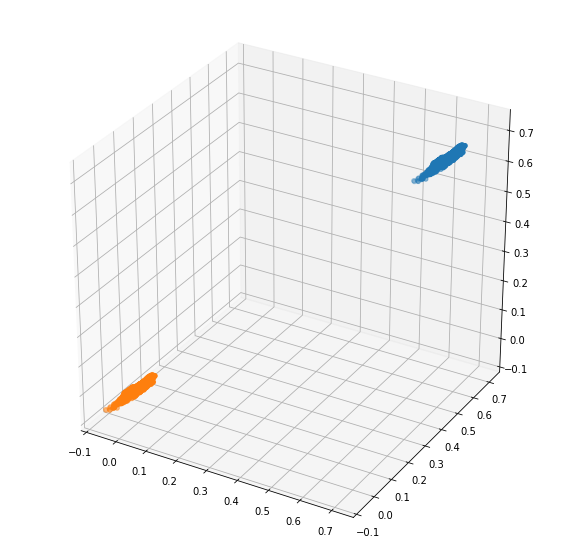

In [138]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.transpose(means)[0],np.transpose(means)[1], np.transpose(means)[2])
ax.scatter(x,y,z)
ax.set_xlim3d(-0.1, 0.75)
ax.set_ylim3d(-0.1, 0.75)
ax.set_zlim3d(-0.1, 0.75)
plt.show()

### plot every pixel value as rgb

In [85]:
path_train = '../dataset3/img_filter/train'
X_train, y_train = ii.images_to_numpy_full_class(path_train, ignore=[], height=16, width=16)
mean_image = ii.calulate_mean(path_train, ignore=[], height=16, width=16)
mean_keras = ii.calculate_mean_keras(X_train)
print(X_train.shape)

np.transpose(X_train).shape

(1875, 16, 16, 3)


(3, 16, 16, 1875)

In [93]:
x = np.transpose(X_train)[:][0]
y = np.transpose(X_train)[:][1]
z = np.transpose(X_train)[:][2]

x_mean = []
y_mean = []
z_mean = []

x_mean_keras = []
y_mean_keras = []
z_mean_keras = []

for pic_x in np.transpose(x):
    x_mean.append(pic_x-np.transpose(mean_image)[0])
    x_mean_keras.append(pic_x-mean_keras[0][0][0])
                          
for pic_y in np.transpose(y):
    y_mean.append(pic_y-np.transpose(mean_image)[1])
    y_mean_keras.append(pic_y-mean_keras[0][0][1])
    
for pic_z in np.transpose(z):
    z_mean.append(pic_z-np.transpose(mean_image)[2])
    z_mean_keras.append(pic_z-mean_keras[0][0][2])

In [94]:
# Saving to txt file for plot in matlab
#
x_save = np.transpose(x)
y_save = np.transpose(y)
z_save = np.transpose(z)

x_mean_save = np.transpose(x_mean)
y_mean_save = np.transpose(y_mean)
z_mean_save = np.transpose(z_mean)

x_mean_keras_save = np.transpose(x_mean_keras)
y_mean_keras_save = np.transpose(y_mean_keras)
z_mean_keras_save = np.transpose(z_mean_keras)

file = open("x.txt","w") 
for pic in x_save:
    for value in pic.flatten():
        file.write(str(value)) 
        file.write('\n')
file.close() 

file = open("y.txt","w") 
for pic in y_save:
    for value in pic.flatten():
        file.write(str(value)) 
        file.write('\n')
file.close() 

file = open("z.txt","w") 
for pic in z_save:
    for value in pic.flatten():
        file.write(str(value)) 
        file.write('\n')
file.close() 

file = open("x_mean.txt","w") 
for pic in x_mean_save:
    for value in pic.flatten():
        file.write(str(value)) 
        file.write('\n')
file.close() 

file = open("y_mean.txt","w") 
for pic in y_mean_save:
    for value in pic.flatten():
        file.write(str(value)) 
        file.write('\n')
file.close() 

file = open("z_mean.txt","w") 
for pic in z_mean_save:
    for value in pic.flatten():
        file.write(str(value)) 
        file.write('\n')
file.close() 

file = open("x_mean_keras.txt","w") 
for pic in x_mean_keras_save:
    for value in pic.flatten():
        file.write(str(value)) 
        file.write('\n')
file.close() 

file = open("y_mean_keras.txt","w") 
for pic in y_mean_keras_save:
    for value in pic.flatten():
        file.write(str(value)) 
        file.write('\n')
file.close() 

file = open("z_mean_keras.txt","w") 
for pic in z_mean_keras_save:
    for value in pic.flatten():
        file.write(str(value)) 
        file.write('\n')
file.close() 

In [56]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.transpose(X_train)[:][0],np.transpose(X_train)[:][1], np.transpose(X_train)[:][2])
ax.scatter(x,y,z)
ax.set_xlim3d(-255, 255)
ax.set_ylim3d(-255, 255)
ax.set_zlim3d(-255, 255)
plt.show()

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000002115AD45D90> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000002115AD58840> (for post_execute):


KeyboardInterrupt: 

In [92]:
print(mean_keras[0][0][1])

159.29999


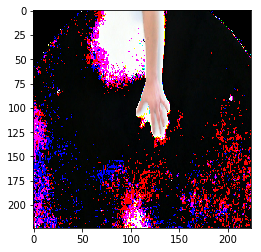

In [23]:
plt.imshow((np.subtract(X_train[90],mean_image)).astype(np.uint8))

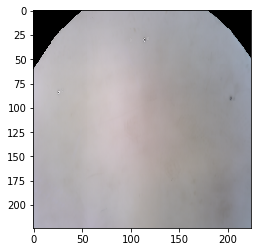

In [17]:
plt.imshow((mean_image).astype(np.uint8))